# Diabetes Prediction

In [45]:
### Step 1 - Importing Modules

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [7]:
import os
os.chdir('Desktop')

In [8]:
###Step 2 – Loading the Dataset
data = pd.read_csv('pima-indians-diabetes.csv')

In [9]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [10]:
## We can see that headers are missing for dataset so lets' assign the headers

In [16]:
data = data.rename(index=str, columns={'6':'preg'})
data = data.rename(index=str, columns={'148':'gluco'})
data = data.rename(index=str, columns={'72':'bp'})
data = data.rename(index=str, columns={'35':'stinmm'})
data = data.rename(index=str, columns={'0':'insulin'})
data = data.rename(index=str, columns={'33.6':'mass'})
data =data.rename(index=str, columns={'0.627':'dpf'})
data = data.rename(index=str, columns={'50':'age'})
data = data.rename(index=str, columns={'1':'target'})
 
data.head()                     

,preg,gluco,bp,stinmm,insulin,mass,dpf,age,target
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [17]:
data.describe()

,preg,gluco,bp,stinmm,insulin,mass,dpf,age,target
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
data.isnull().sum()

preg       0
gluco      0
bp         0
stinmm     0
insulin    0
mass       0
dpf        0
age        0
target     0
dtype: int64

In [19]:
## as we can see no null values in the dataset so we can split the dataset into x and y

In [20]:
### Step 3 - Assigning values for X and Y

In [22]:
X # Independent Variable

,preg,gluco,bp,stinmm,insulin,mass,dpf,age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [23]:
Y # Dependent Variable

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: target, Length: 767, dtype: int64

### Model 1 : Logistic Regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
x = data.iloc[:, :-1]
y = data.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       177
           1       0.65      0.53      0.59        77

    accuracy                           0.77       254
   macro avg       0.73      0.70      0.71       254
weighted avg       0.76      0.77      0.76       254

[[155  22]
 [ 36  41]]
0.7716535433070866


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
###Confusion matrix heatmap:

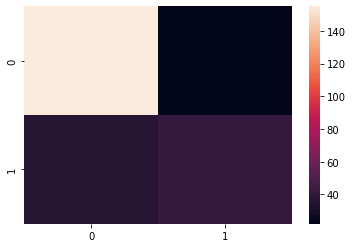

In [46]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()


In [ ]:
## Our model predicted the accuracy score as 77% which is good.

### Model 2 - KNN

In [49]:
# Model KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred = classifier.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[147  30]
 [ 37  40]]


0.7362204724409449

In [54]:
(147+40)/(147+30+37+40)

0.7362204724409449

In [56]:
# Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X= X,y = y,cv = 20)# 10 fold times test data is validated
print(accuracies.mean())

0.7225033738191632


In [ ]:
## After using KNN model we got 72% accuracy which is less than 1st model

### Model 3 - Logistic Regression

In [57]:
x = data.iloc[:, :-1]
y = data.iloc[:,8]

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [67]:

y_pred = classifier.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[118  13]
 [ 27  34]]


In [69]:
(118+34)/(118+13+27+37)

0.7794871794871795

In [70]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7916666666666666


In [ ]:
#Analyzing the performance measures – accuracy and confusion matrix, we can clearly say that logistic regression model is performing well.